# HW10

### Jingheng Huan
NetID: jh730

Q1: Derive a standard form LP model with two nonnegative decision
variables, {x1 ≤ 12, x2 ≤ 16}, for maximizing the following sum: 36x1 + 25x2. A
solution is feasible if the sum of the decision variables is at most 20.

Maximize: Z = 36x<sub>1</sub> + 25x<sub>2</sub>

Subject to the constraints:

x<sub>1</sub> + x<sub>2</sub> ≤ 20 (The sum of the decision variables is at most 20)

x<sub>1</sub> ≤ 12

x<sub>2</sub> ≤ 16

x<sub>1</sub>, x<sub>2</sub> ≥ 0 (Non-negativity constraints)

This is the standard form Linear Programming model for the given problem. The objective is to find the values of x<sub>1</sub> and x<sub>2</sub> that maximize Z, subject to the constraints.

Q2: Perform the Simplex algorithm to solve the corresponding
LP model from the previous question.

In [1]:
from scipy.optimize import linprog

# Coefficients of the objective function
c = [-36, -25] # We use negative Coefficients because linprog minimizes the objective function

# Coefficients of the inequality constraints
A = [[1, 1], [1, 0], [0, 1]]

# Right hand side of the inequality constraints
b = [20, 12, 16]

# Bounds for the variables
x0_bounds = (0, None)
x1_bounds = (0, None)

res = linprog(c, A_ub = A, b_ub = b, bounds = [x0_bounds, x1_bounds], method = 'highs')

print('Optimal value:', -res.fun, '\nx values:', res.x)

Optimal value: 632.0 
x values: [12.  8.]


The optimal solution to the linear programming problem is when x<sub>1</sub> = 12, x<sub>2</sub> = 8, and Z = 36(12) + 25(8) = 632.

Q3: Visualize the feasible solution space of an LP model with two decision
variables, {x1, x2}, and the constraint of |x1| + |x2| ≤ 1.

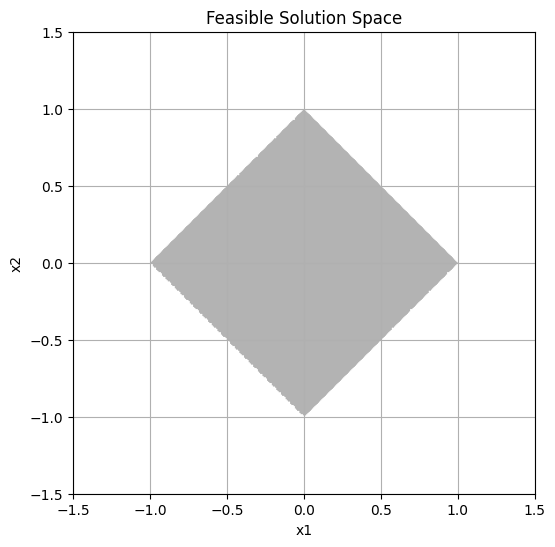

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-1.5, 1.5, 400)
x2 = np.linspace(-1.5, 1.5, 400)
x1, x2 = np.meshgrid(x1, x2)

mask = np.abs(x1) + np.abs(x2) <= 1

plt.figure(figsize=(6,6))
plt.imshow(mask, extent=(x1.min(), x1.max(), x2.min(), x2.max()), origin = 'lower', cmap = "Greys", alpha = 0.3)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Feasible Solution Space')

plt.grid(True)
plt.show()

Q4: The maximum flow problem is revised by adding a non-negative
capacity constraint to each vertex in addition to the capacity constraints on the
edges. This vertex capacity constraint denotes that the incoming flow to a
particular vertex is bounded by a vertex capacity value. Explain how this maximum
flow problem variant can be directly solved with any algorithm designed for the
original maximum flow problem (i.e., without modifying the algorithm).

For each vertex `v` (except the source and sink) in the original graph, we can divide it into two vertices `v_in` and `v_out`. Then, we replace the original edge `(u, v)` (capacity c) with two edges `(u_out, v_in)` and `(v_out, u_in)` (both of these two edges have capacity c). In this way, we maintain the original edge capacities. After that, we add an edge from `v_in` to `v_out` for each vertex `v` with capacity equal to the vertex capacity of `v`. We also use the `source` and `sink` from the original graph as the `source` and `sink` in the new graph. Finally, we can solve the modified maximum flow problem using any algorithm (Ford-Fulkerson and Edmonds-Karp) designed for the original maximum flow problem.

Q5: After specifying the strategy for the modified maximum flow problem
concerning the previous question, derive a modified maximum flow problem
instance based on the example graph below, also available in the lecture slides, by
adding some capacities to the vertices. Then, solve it using OR-Tools:
https://developers.google.com/optimization/flow/maxflow and report the results,
with screenshots.

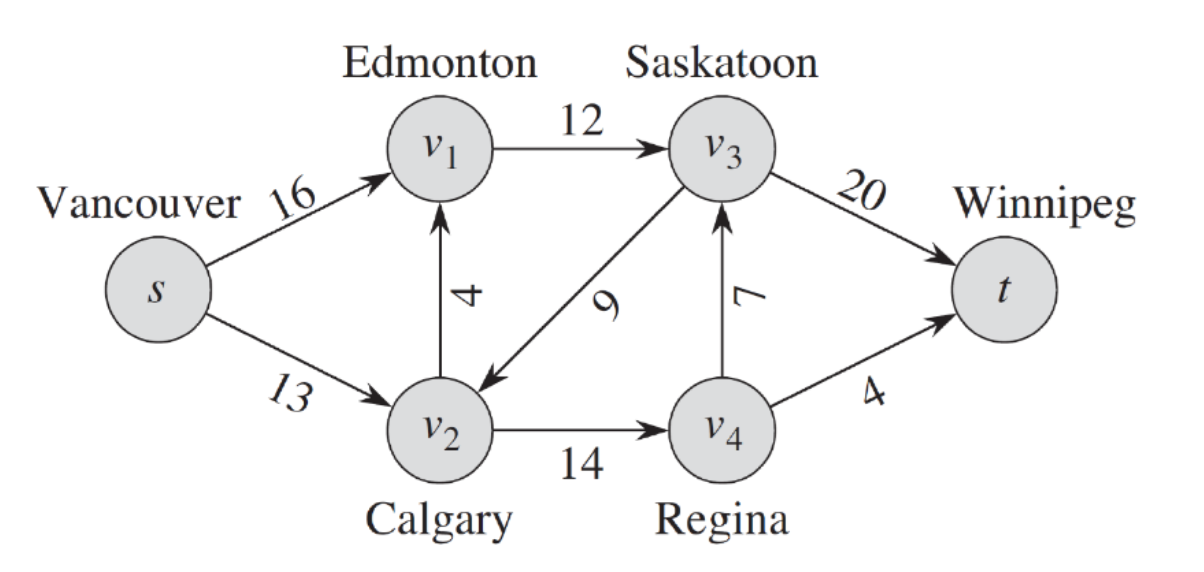

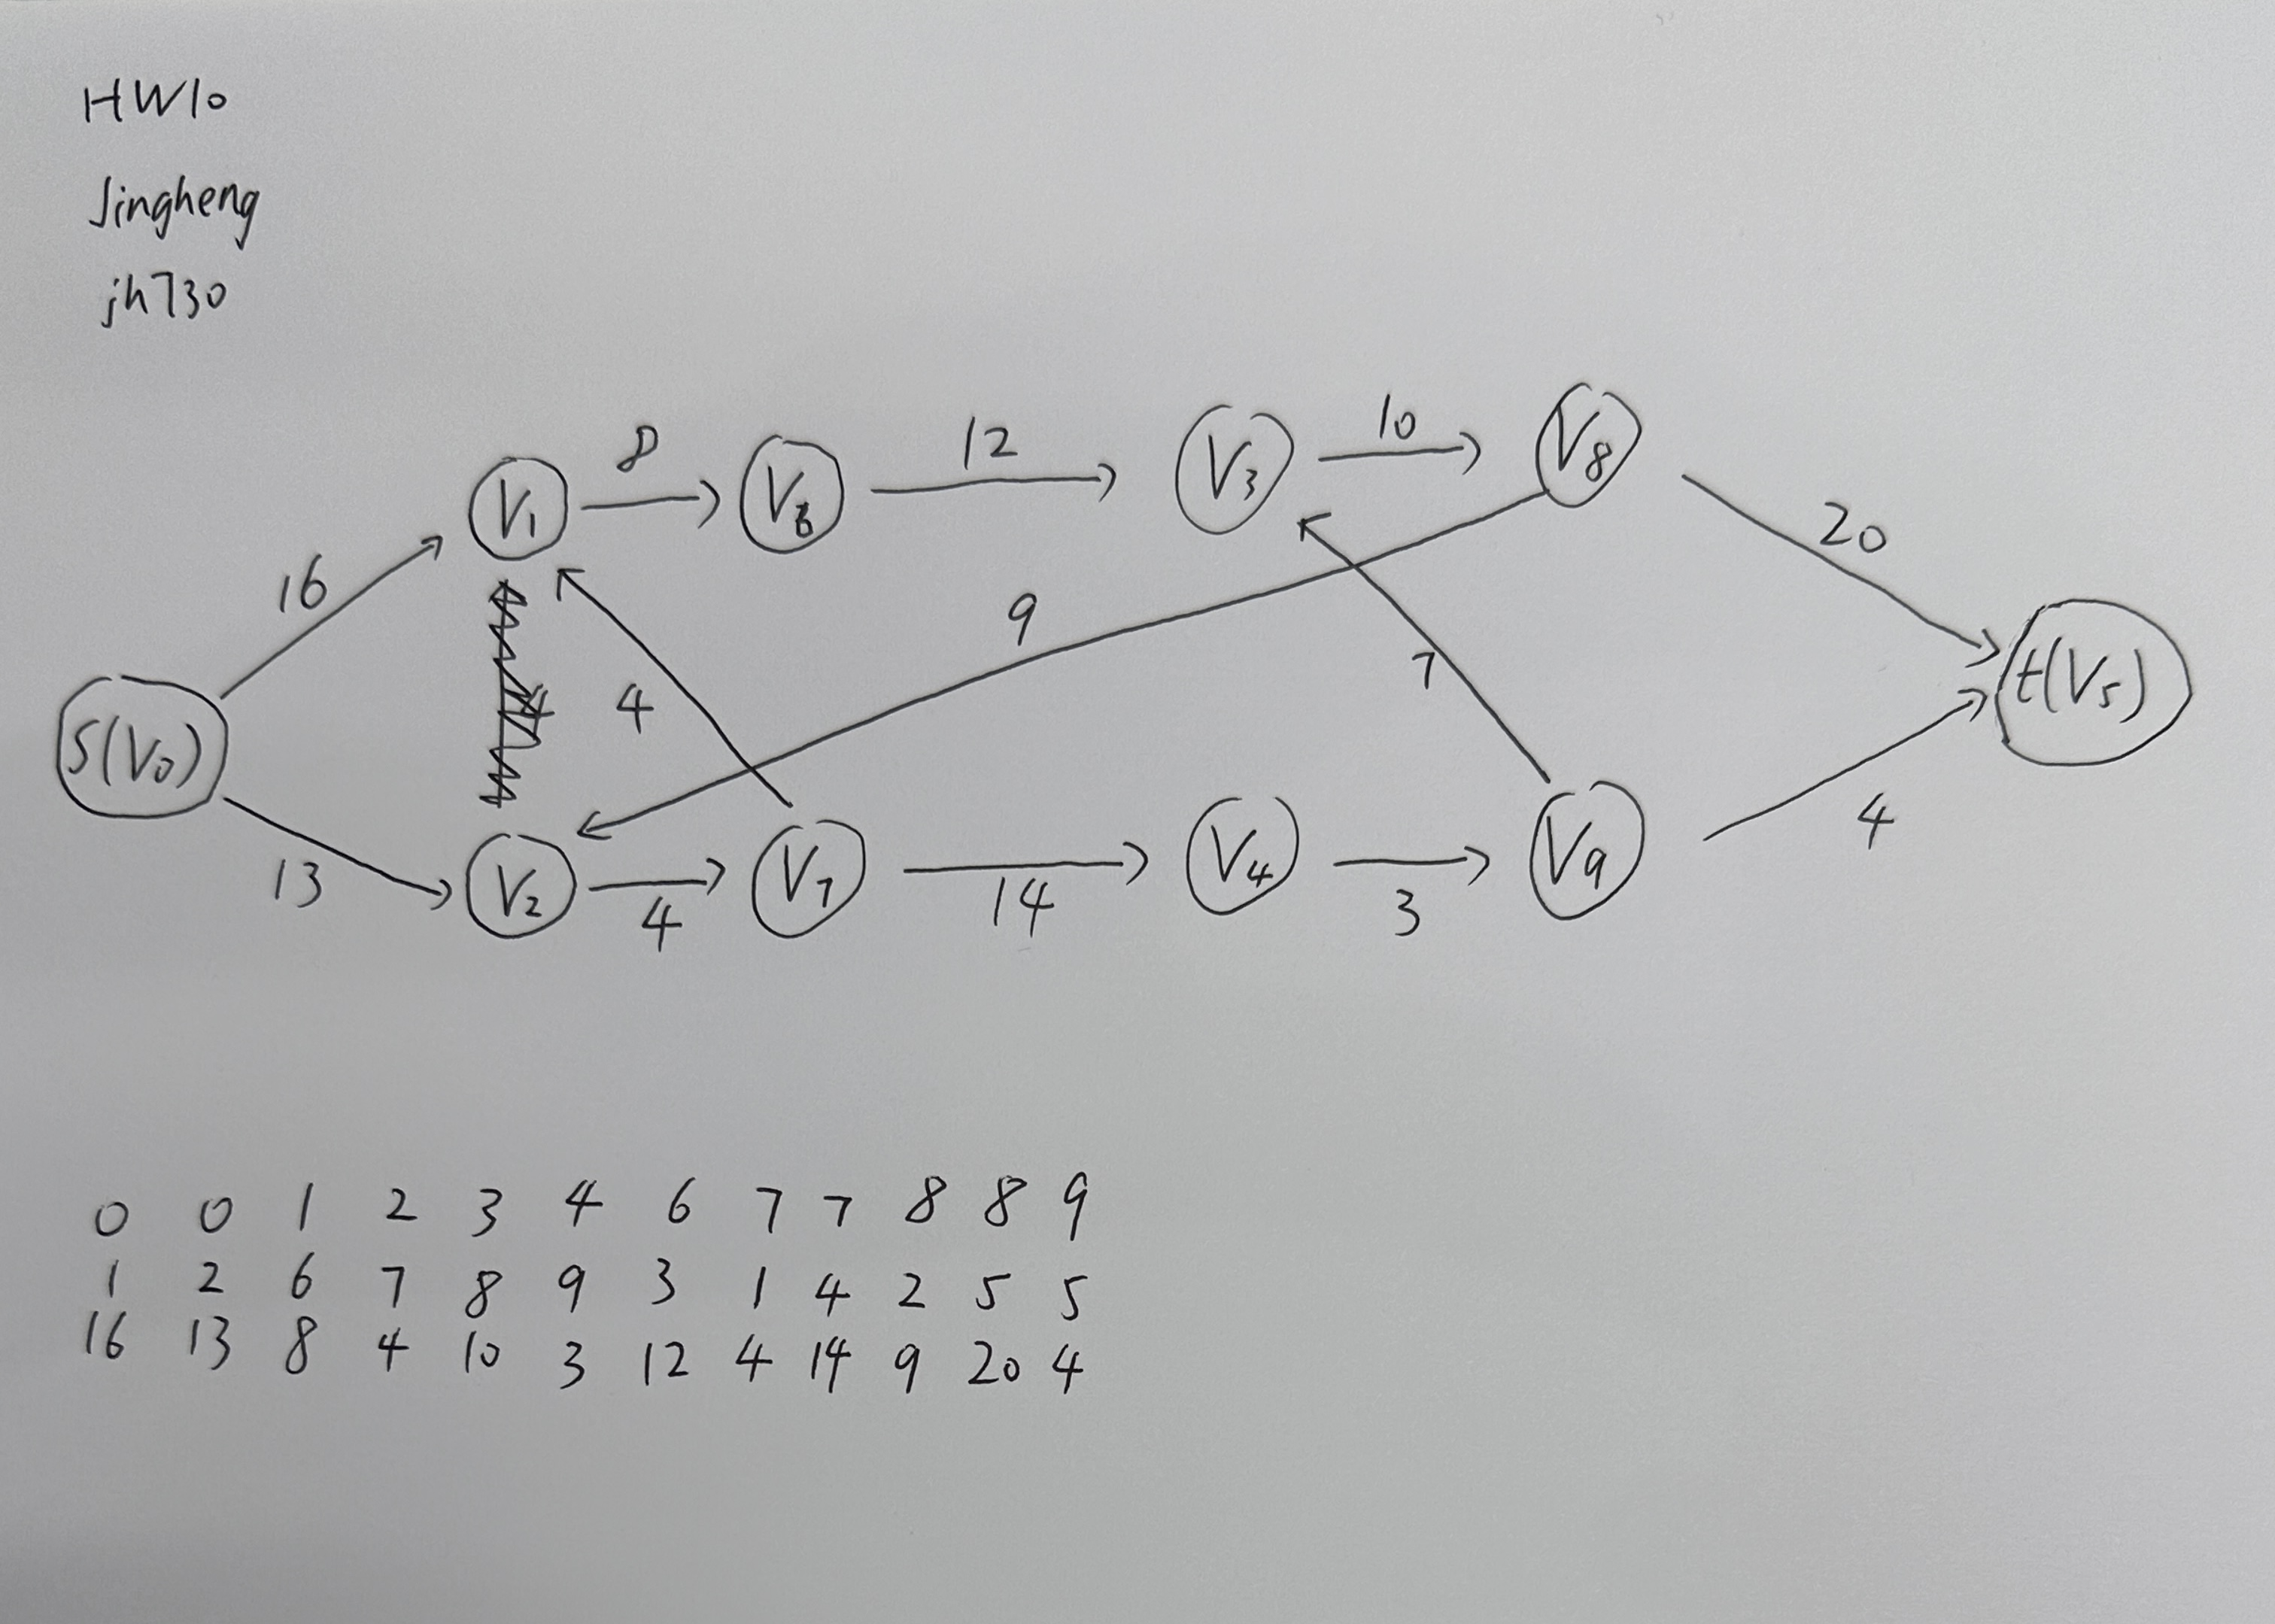

In [3]:
from IPython.display import Image, display

display(Image(filename='max_flow.png'))
display(Image(filename='HW10Q5.jpg'))

I assume that the vertices v<sub>1</sub>, v<sub>2</sub>, v<sub>3</sub>, and v<sub>4</sub> have their own capacities 8, 4, 10, 3, since they are not explicitly given in the slides. Let's say `s` is v<sub>0</sub>, and `t` is v<sub>5</sub>.

In [4]:
import numpy as np

from ortools.graph.python import max_flow

def main():
    """MaxFlow simple interface example."""
    # Instantiate a SimpleMaxFlow solver.
    smf = max_flow.SimpleMaxFlow()

    # Define three parallel arrays: start_nodes, end_nodes, and the capacities
    # between each pair. For instance, the arc from node 0 to node 1 has a
    # capacity of 20.
    start_nodes = np.array([0, 0, 1, 2, 3, 4, 6, 7, 7, 8, 8, 9])
    end_nodes   = np.array([1, 2, 6, 7, 8, 9, 3, 1, 4, 2, 5, 5])
    capacities  = np.array([16, 13, 8, 4, 10, 3, 12, 4, 14, 9, 20, 4])

    # Add arcs in bulk.
    #   note: we could have used add_arc_with_capacity(start, end, capacity)
    all_arcs = smf.add_arcs_with_capacity(start_nodes, end_nodes, capacities)

    # Find the maximum flow between node 0 and node 4.
    status = smf.solve(0, 5)

    if status != smf.OPTIMAL:
        print("There was an issue with the max flow input.")
        print(f"Status: {status}")
        exit(1)
    print("Max flow:", smf.optimal_flow())
    print("")
    print(" Arc    Flow / Capacity")
    solution_flows = smf.flows(all_arcs)
    for arc, flow, capacity in zip(all_arcs, solution_flows, capacities):
        print(f"{smf.tail(arc)} / {smf.head(arc)}   {flow:3}  / {capacity:3}")
    print("Source side min-cut:", smf.get_source_side_min_cut())
    print("Sink side min-cut:", smf.get_sink_side_min_cut())

if __name__ == "__main__":
    main()

Max flow: 11

 Arc    Flow / Capacity
0 / 1     8  /  16
0 / 2     3  /  13
1 / 6     8  /   8
2 / 7     3  /   4
3 / 8     8  /  10
4 / 9     3  /   3
6 / 3     8  /  12
7 / 1     0  /   4
7 / 4     3  /  14
8 / 2     0  /   9
8 / 5     8  /  20
9 / 5     3  /   4
Source side min-cut: [0, 1, 2, 7, 4]
Sink side min-cut: [5, 8, 9, 3, 6]
